# Identify Overfitting in Deep Learning

Overfitting occurs when a model learns the training data too well, capturing noise and details that do not generalize to new data. This results in poor performance on the validation or test set. 
<p>

`Train Accuracy >> Test Accuracy -> called overfitting` 
</br>

`Train Accuracy similar to Test Accuracy -> called best fit`


</br>

![Overfitting](https://github.com/user-attachments/assets/04940d5b-d8e4-4329-ad45-c56ae5fc7913)
</br>
</p>
Here are two common techniques to identify and mitigate overfitting:

## Early Stopping

Early stopping is a technique where the training process is halted when the model's performance on a validation set starts to degrade. This prevents the model from overfitting the training data.

### Steps:
1. Split the data into training and validation sets.
2. Train the model on the training set.
3. Monitor the model's performance on the validation set.
4. Stop training when the validation performance stops improving.

## Regularization

Regularization techniques add a penalty to the loss function to constrain the model's complexity, discouraging it from fitting the noise in the training data.

### Common Regularization Techniques:
- **L1 Regularization (Lasso)**: Adds the absolute value of the weights to the loss function.
- **L2 Regularization (Ridge)**: Adds the squared value of the weights to the loss function.
- **Dropout**: Randomly sets a fraction of the input units to zero at each update during training, which helps prevent overfitting.



By using early stopping and regularization, you can effectively identify and mitigate overfitting in your deep learning models.

# Practical

In [314]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [315]:
dataset = pd.read_csv(r'C:\Users\shark\Desktop\Deep Learning\CampusX\Dataset\Churn_Modelling.csv')
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [316]:
input_data = dataset.iloc[:, :-1]
output_data = dataset.iloc[:, -1]

In [317]:
ss = StandardScaler()
ss.fit_transform(input_data)

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [318]:
input_data = pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)
input_data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687


In [319]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [320]:
import tensorflow as tf
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [321]:
ann = Sequential()
ann.add(Dense(units=6, activation='relu', input_dim=8,kernel_regularizer=l2(0.01)))
ann.add(Dense(units=4, activation='relu',kernel_regularizer=l2(0.01)))
#add regularization to the hidden layers
ann.add(Dense(units=2, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [322]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [323]:
ann.fit(x_train, y_train,batch_size=100, epochs=100,validation_data=(x_test,y_test),callbacks=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)) #Early stopping

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5737 - loss: 0.8224 - val_accuracy: 0.8045 - val_loss: 0.7397
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.7126 - val_accuracy: 0.8035 - val_loss: 0.6327
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 0.6209 - val_accuracy: 0.8035 - val_loss: 0.5637
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.5609 - val_accuracy: 0.8035 - val_loss: 0.5226
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.5152 - val_accuracy: 0.8035 - val_loss: 0.4875
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7865 - loss: 0.4991 - val_accuracy: 0.8035 - val_loss: 0.4626
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7883 - loss: 0.4785 - val_accuracy: 0.8035 - val_loss: 0.4469
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.4496 - val_accuracy: 0.8035 - v

In [324]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [325]:
ann.history.history

{'accuracy': [0.6728749871253967,
  0.7947499752044678,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7961249947547913,
  0.8408750295639038,
  0.8416249752044678,
  0.8451250195503235,
  0.8445000052452087,
  0.847000002861023,
  0.8466249704360962,
  0.8475000262260437,
  0.8461250066757202,
  0.8491250276565552,
  0.8495000004768372,
  0.8491250276565552,
  0.8492500185966492,
  0.8488749861717224,
  0.8506249785423279,
  0.8519999980926514,
  0.8503749966621399,
  0.8521249890327454,
  0.8513749837875366,
  0.8501250147819519,
  0.8518750071525574,
  0.8528749942779541,
  0.8537499904632568,
  0.8514999747276306,

In [326]:
train_accuracy = ann.history.history['accuracy']
val_accuracy = ann.history.history['val_accuracy']
print(train_accuracy[-1])
print(val_accuracy[-1])

0.8581249713897705
0.8535000085830688


In [327]:
print(len(train_accuracy))
print(len(val_accuracy))

100
100


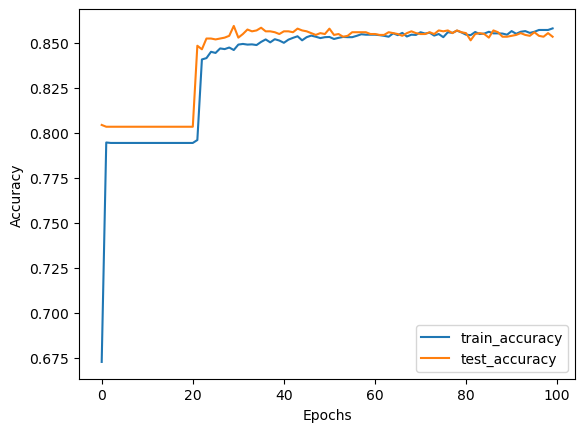

In [328]:
plt.plot(range(0,len(train_accuracy)), train_accuracy, label='train_accuracy')
plt.plot(range(0,len(val_accuracy)), val_accuracy, label='test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [329]:
prd = ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [330]:
prd_data = []
for i in prd:
    if i > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [331]:
accuracy_score(y_test, prd_data)*100

85.35000000000001

In [332]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
    if i > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


In [333]:
accuracy_score(y_train,prd_data1)*100

85.48750000000001

In [334]:
print("Train Accuracy: ", accuracy_score(y_train,prd_data1)*100)
print("Test Accuracy: ", accuracy_score(y_test, prd_data)*100)

Train Accuracy:  85.48750000000001
Test Accuracy:  85.35000000000001


![Image](https://github.com/user-attachments/assets/3f9b3254-9950-436e-abc6-354ae09d930d)